<a href="https://colab.research.google.com/github/Data-finest/Habibty/blob/main/CNN_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using more sophisticated images with Convolutional Neural Networks

In the previous lesson you saw how to use a CNN to make your recognition of the handwriting digits more efficient. In this lesson you'll take that to the next level, recognizing real images of Cats and Dogs in order to classify an incoming image as one or the other. In particular the handwriting recognition made your life a little easier by having all the images be the same size and shape, and they were all monochrome color. Real-world images aren't like that -- they're in different shapes, aspect ratios etc, and they're usually in color!

So, as part of the task you need to process your data -- not least resizing it to be uniform in shape. 

You'll follow these steps:

1.   Explore the Example Data of Cats and Dogs
2.   Build and Train a Neural Network to recognize the difference between the two
3.   Evaluate the Training and Validation accuracy

**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-10-29 14:49:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   166MB/s    in 0.4s    

2021-10-29 14:49:24 (166 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.212.jpg', 'cat.274.jpg', 'cat.171.jpg', 'cat.830.jpg', 'cat.672.jpg', 'cat.100.jpg', 'cat.251.jpg', 'cat.7.jpg', 'cat.122.jpg', 'cat.947.jpg']
['dog.58.jpg', 'dog.173.jpg', 'dog.324.jpg', 'dog.679.jpg', 'dog.579.jpg', 'dog.312.jpg', 'dog.192.jpg', 'dog.887.jpg', 'dog.653.jpg', 'dog.76.jpg']


In [ ]:
#find the number of train and validation dirctories of cats and dogs

print("total training cat images :", len(os.listdir(  train_cats_dir)))
print("total training dog images :", len(os.listdir(  train_dogs_dir)))

print("total validation cat images :", len(os.listdir( validation_cats_dir)))
print("total validation dog images :", len(os.listdir( validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# parametres for the graph; we'll outpu in 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 #Index for iterating over images

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

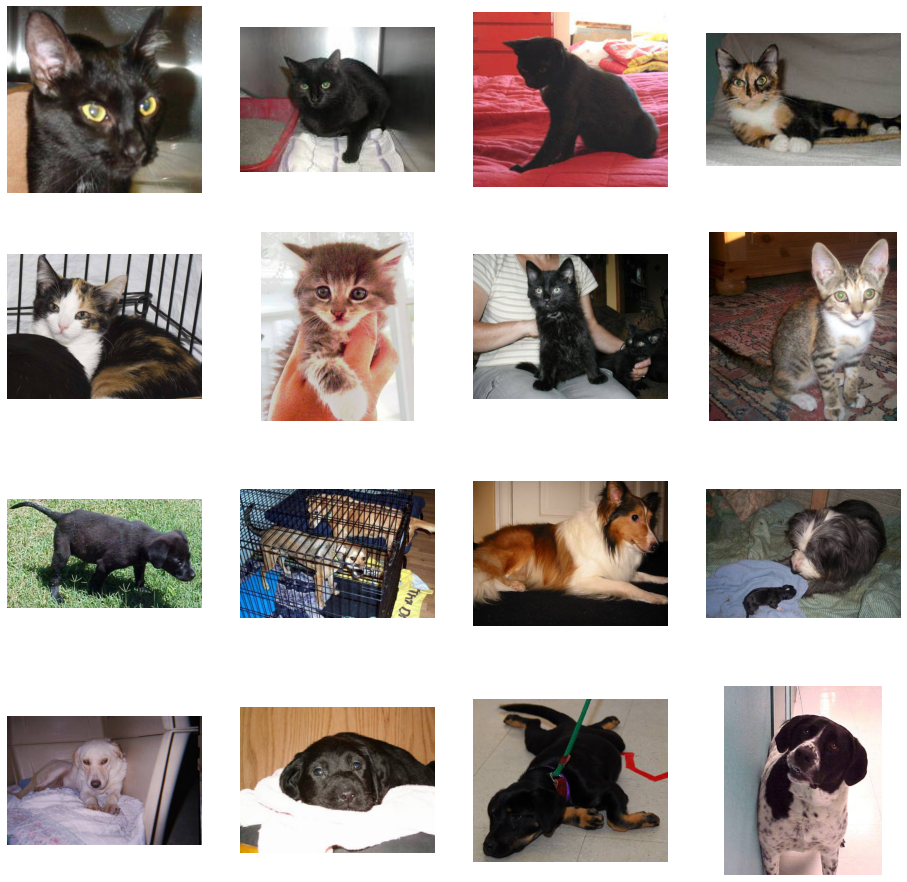

In [ ]:
#set-up matplotlib fig and size it in other to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf


In [ ]:
model = tf.keras.models.Sequential([
    #Note the input shape is the desired size of the image 150x150 with 3 colours
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation ="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation ="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation ="relu"),
    #Flatten the results to feed into DNN
    tf.keras.layers.Flatten(),
    #512 neurons hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    #Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1./255
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

#Flow training images in batches of 20 using train_datagen generator

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

#Validation images
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 53s - loss: 0.7053 - accuracy: 0.5460 - val_loss: 0.6552 - val_accuracy: 0.6390
Epoch 2/15
100/100 - 52s - loss: 0.6450 - accuracy: 0.6360 - val_loss: 0.6223 - val_accuracy: 0.6520
Epoch 3/15
100/100 - 52s - loss: 0.5972 - accuracy: 0.6915 - val_loss: 0.5577 - val_accuracy: 0.7190
Epoch 4/15
100/100 - 51s - loss: 0.5247 - accuracy: 0.7440 - val_loss: 0.5517 - val_accuracy: 0.7290
Epoch 5/15
100/100 - 51s - loss: 0.4653 - accuracy: 0.7860 - val_loss: 0.5942 - val_accuracy: 0.6930
Epoch 6/15
100/100 - 53s - loss: 0.4108 - accuracy: 0.8150 - val_loss: 0.5818 - val_accuracy: 0.7430
Epoch 7/15
100/100 - 52s - loss: 0.3489 - accuracy: 0.8465 - val_loss: 0.6063 - val_accuracy: 0.7170
Epoch 8/15
100/100 - 51s - loss: 0.3088 - accuracy: 0.8720 - val_loss: 0.5865 - val_accuracy: 0.7420
Epoch 9/15
100/100 - 51s - loss: 0.2308 - accuracy: 0.9100 - val_loss: 0.6613 - val_accuracy: 0.7460
Epoch 10/15
100/100 - 51s - loss: 0.1932 - accuracy: 0.9200 - val_loss: 0.6776 - val_accura

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path='/content/' + fn
  img= image.load_img(path, target_size=(150, 150))

  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=20)

  print